# Caso de Estudio del Titanic

## Definición de preguntas y problemas

Este proyecto ha sido seleccionado de la plataforma Kaggle, la cual define el problema que se debe resolver o las preguntas que se deben formular mientras proporcionan los conjuntos de datos para entrenar su modelo de ciencia de datos y probar los resultados del modelo con un conjunto de datos de prueba. La pregunta o definición del problema del __Titanic Survival__ se describe aquí en Kaggle.

Sabiendo a partir de un conjunto de muestras de entrenamiento que enumera a los pasajeros que sobrevivieron o no al desastre del Titanic, nuestro modelo puede determinar en base a un conjunto de datos de prueba dado que no contiene la información de supervivencia, si estos pasajeros en el conjunto de datos de prueba sobrevivieron o no.

Vamos a ver una descripción inicial sobre el dominio de nuestro problema. Estos son los aspectos más destacados a tener en cuenta.

* El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulación. 
* Tasa de supervivencia del 32%.
* Una de las razones por las que el naufragio provocó tantas pérdidas de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación.
* Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

## Objetivos del proyecto

El flujo de trabajo de este __proyecto de ciencia de datos__ resuelve __siete objetivos__ principales.

* __Clasificación.__ Es posible que deseemos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo.


* __Correlación.__ Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado. También es posible que deseemos determinar la correlación entre características distintas de la supervivencia para los objetivos posteriores y las etapas del flujo de trabajo. Correlacionar ciertas características puede ayudar a crear, completar o corregir características.


* __Conversión.__ Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del modelo de algoritmo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Por ejemplo, convertir valores categóricos de texto en valores numéricos.


* __Completado.__ La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos de modelado pueden funcionar mejor cuando no faltan valores.


* __Corrección.__ También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posibles valores inexactos dentro de las características e intentar corregir estos valores o excluir las muestras que contienen los errores. Una forma de hacerlo es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar completamente una característica si no contribuye al análisis o puede sesgar significativamente los resultados.


* __Creación.__ ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?


* __Gráficos.__ Cómo seleccionar los gráficos y diagramas de visualización correctos según la naturaleza de los datos y los objetivos de la solución.

## Imports

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np
import random as rnd

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Cargar datos

Pandas nos ayudan a trabajar con nuestros conjuntos de datos. Comenzamos cargando los conjuntos de datos de entrenamiento y prueba y convirtiendolos a DataFrames de Pandas. También combinamos estos conjuntos de datos para ejecutar ciertas operaciones en ambos conjuntos de datos juntos.

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

## Analizar los datos

Pandas también ayuda a describir los conjuntos de datos de nuestros DataFrames. A continuación listamos las columnas del conjunto de entrenamiento. Para más detalle se puede consultar el siguiente enlace: https://www.kaggle.com/c/titanic/data

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Descripción

* PassengerId: ID del pasajero
* Survived: Supervivencia o no supervivencia (1 = Superviviente / 0 = No superviviente)
* Pclass: Clase del pasajero (1/2/3)
* Name: Nombre completo del pasajero
* Sex: Sexo del pasajero
* Age: Edad del pasajero
* SibSp: Hermanos/conyuges a bordo
* Parch: Padres/hijos a bordo
* Ticket: ID del ticket
* Fare: Tarifa
* Cabin: Camarote asignado
* Embarked: Puerta de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

<img src="./Caracteristicas.png"/>

**¿Qué características son categóricas (cualitativas)?**

Una variable categórica es una variable con un número limitado de valores distintos o categorías. Estos valores clasifican las muestras en conjuntos de muestras similares. Dentro de las características categóricas, ¿los valores se basan en valores nominales, ordinales, de razón o de intervalo? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.

* Categóricas nominales: Una variable puede ser tratada como nominal cuando sus valores representan categorías que no obedecen a una clasificación intrínseca. Por ejemplo, el departamento de la compañía en el que trabaja un empleado.
    + **Survived, Sex, and Embarked.** 


* Categóricas ordinales: Una variable puede ser tratada como ordinal cuando sus valores representan categorías con alguna clasificación intrínseca. Por ejemplo, los niveles de satisfacción con un servicio, que abarquen desde muy insatisfecho hasta muy satisfecho.
    + **Pclass.**

**¿Qué características son numéricas (cuantitativas)?**

¿Qué características son numéricas? Estos valores cambian de una muestra a otra. Dentro de las características numéricas, ¿los valores son discretos, continuos o basados en series temporales? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.

- Numéricas continuas: Una variable que puede asumir un número incontable de valores.
    + **Age, Fare.**
- Numéricas discretas: Una variable que puede asumir un número contable de valores.
    + **SibSp, Parch.**

In [4]:
# Preview de los datos
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**¿Qué características son tipos de datos mixtos?**

Datos numéricos y alfanuméricos dentro de la misma característica. Estos son candidatos para una futura corrección.

- Ticket es un mixto de numérica y alfanumérica (Ejemplos: 211536 y W./C. 6607)
- Cabin es alfanumérica (Ejemplo: C148)

**¿Qué características pueden contener errores de tipos?**

Esto es más difícil de revisar para un conjunto de datos grande; sin embargo, revisar algunas muestras de un conjunto de datos más pequeño puede decirnos directamente qué características pueden requerir corrección.

- Name puede contener errores tipográficos, ya que hay varias formas de describir un nombre, incluidos títulos, corchetes y comillas para nombres alternativos o cortos.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**¿Qué características contienen valores en blanco, nulos o vacíos?**

Éstos requerirán corrección.

- Cabin > Age > Embarked contienen una cantidad de valores nulos en ese orden para el conjunto de datos de entrenamiento.
- Cabin > Age  están incompletos en el caso del conjunto de datos de prueba.

**¿Cuáles son los tipos de datos de las características?**

- 7 características son números enteros o flotantes. 6 en el caso de un conjunto de datos de prueba.
- 5 características son cadenas de texto o strings (object).

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**¿Cuál es la distribución de valores de características numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

- Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2224).
- Survived es una característica categórica con valores 0 o 1.
- Alrededor del 38% de las muestras sobrevivieron, lo que es representativo de la tasa de supervivencia real del 32%.
- La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.
- Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.
- Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron hasta 512 dolares.
- Pocos pasajeros mayores (<1%) dentro del rango de edad de 65 a 80 años.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**¿Cuál es la distribución de características categóricas?**

- Name: los nombres son únicos en todo el conjunto de datos (recuento = único = 891)
- Sex: dos valores posibles con 65% de hombres (top = hombres, frecuencia = 577,  recuento = 891).
- Cabin: Los valores de cabina tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartieron una cabina.
- Embarked: toma tres valores posibles. Puerto S utilizado por la mayoría de los pasajeros (top = S)
- Ticket: tiene una alta proporción (22%) de valores duplicados (único = 681).

In [8]:
train_df.describe(include=['O']) # Este include es para mostrar las variable categóricas

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Supuestos basados en el análisis de los datos

Llegamos a los siguientes supuestos basados en el análisis de datos realizado hasta ahora. Podemos validar más estas suposiciones antes de tomar las medidas adecuadas.

**Correlación.**

Queremos saber qué tan bien se correlaciona cada característica con Survival. Queremos hacer esto al principio de nuestro proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas posteriormente en el proyecto.

**Completado.**

1. Es posible que queramos completar la característica Age, ya que definitivamente está relacionada con la supervivencia.
2. Es posible que queramos completar la característica Embarked, ya que también puede estar relacionada con la supervivencia u otra función importante.

**Corrección.**

1. Ticket  puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y puede que no haya una correlación entre Ticket y Survival.
2. Cabin puede descartarse porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.
3. PassengerId puede eliminarse del conjunto de datos de entrenamiento porque no contribuye a la supervivencia.
4. Name es relativamente no estándar, puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

**Creación.**

1. Es posible que deseemos crear una nueva función llamada Family basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
2. Es posible que deseemos diseñar la función Name para extraer Title como una característica nueva.
3. Es posible que deseemos crear una nueva característica para las bandas de edad. Esto convierte una característica numérica continua en una característica categórica ordinal.
4. También es posible que deseemos crear una función de rango de tarifas si ayuda a nuestro análisis.

**Clasificación.**

También podemos agregar a nuestras suposiciones basándonos en la descripción del problema mencionada anteriormente.

1. Las mujeres (Sex=female) tenían más probabilidades de haber sobrevivido.
2. Los niños (Age<?) tenían más probabilidades de haber sobrevivido.
3. Los pasajeros de clase alta (Pclass=1) tenían más probabilidades de haber sobrevivido.

## Analizar mediante funciones pivotantes

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de características haciendo pivotar las características entre sí. Solo podemos hacerlo en esta etapa para las características que no tienen valores vacíos. También tiene sentido hacerlo solo para características que son de tipo categórico (Sex), ordinal (Pclass) o discreto (SibSp, Parch).

- **Pclass** Observamos una correlación significativa (> 0.5) entre Pclass = 1 y Survived. Decidimos incluir esta característica en nuestro modelo.
- **Sex** Confirmamos la observación durante la definición del problema de que Sex = female tuvo una tasa de supervivencia muy alta del 74%.
- **SibSp and Parch** Estas características tienen una correlación cero para ciertos valores. Puede ser mejor derivar una característica o un conjunto de características a partir de estas características individuales.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualización de los datos

Ahora podemos continuar confirmando algunas de nuestras suposiciones utilizando visualizaciones para analizar los datos.

### Correlacionar características numéricas.

Comencemos por comprender las correlaciones entre las características numéricas y nuestro objetivo de solución (Survived).

Un gráfico de histograma es útil para analizar variables numéricas continuas como Edad, donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando grupos definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Tuvieron los bebés una mejor tasa de supervivencia?)

Tenga en cuenta que el eje x en las visualizaciones del historgram representa el recuento de muestras o pasajeros.

**Observaciones.**

- Infantes (Age <=4) tenían una alta tasa de supervivencia.
- Ancianos (Age = 80) sobrevivieron.
- Un gran número de jóvenes de 15 a 25 años no sobrevivió.
- La mayoría de las pasajeros tienen entre 15 y 35 años.

**Decisiones.**

Este simple análisis confirma nuestras suposiciones como decisiones para las etapas posteriores del flujo de trabajo.

- Debemos considerar la edad en nuestro modelo de entrenamiento.
- Complete la función Edad para valores nulos.
- Deberíamos agrupar grupos de edad.

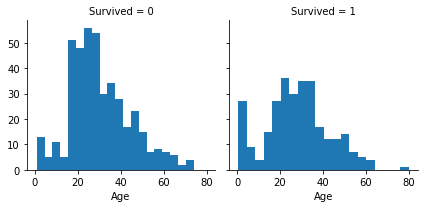

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlacionar características numéricas y ordinales

Podemos combinar múltiples características para identificar correlaciones usando un solo gráfico. Esto se puede hacer con características numéricas y categóricas que tienen valores numéricos.

**Observaciones.**

- Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió. 
- La mayoría de los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron. 
- La mayoría de los pasajeros de Pclass = 1 sobrevivieron. 
- Pclass varía en términos de distribución por edad de los pasajeros.

**Decisiones.**

- Considere Pclass para el entrenamiento de modelos.

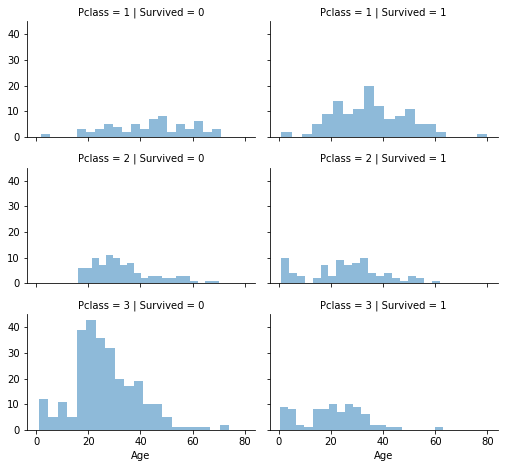

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlacionar características categóricas

Ahora podemos correlacionar características categóricas con nuestro objetivo de solución.

**Observaciones.**

- Las pasajeras tenían una tasa de supervivencia mucho mejor que los hombres. 
- Excepción en Embarked = C donde los hombres tuvieron una mayor tasa de supervivencia. Esto podría ser una correlación entre Pclass y Embarked y, a su vez, Pclass y Survived, no necesariamente una correlación directa entre Embarked y Survived.
- Los hombres tuvieron una mejor tasa de supervivencia en Pclass = 3 en comparación con Pclass = 2 para los puertos C y Q.
- Los puertos de embarque tienen tasas de supervivencia variables para Pclass = 3 y entre pasajeros masculinos. 

**Decisiones.**

- Agregue la función Sexo al entrenamiento de modelos.
- Complete y agregue la función Embarked al entrenamiento de modelos.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


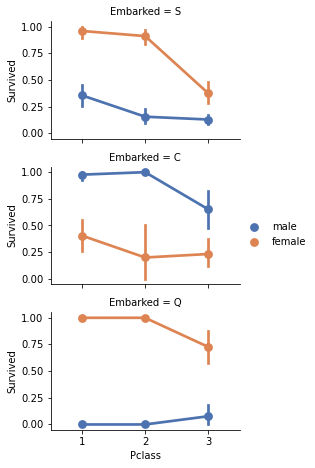

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlacionar características categóricas y numéricas

También es posible que deseemos correlacionar características categóricas (con valores no numéricos) y características numéricas. Podemos considerar correlacionar Embarked (Categórico no numérico), Sex (Categórico no numérico), Fare (Numérico continuo), con Survived (Categórico numérico).

**Observaciones.**

- Los pasajeros que pagan tarifas más altas tienen una mejor supervivencia. 
- El puerto de embarque se correlaciona con las tasas de supervivencia. 

**Decisiones.**

- Considere la posibilidad de incluir la función de tarifa.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


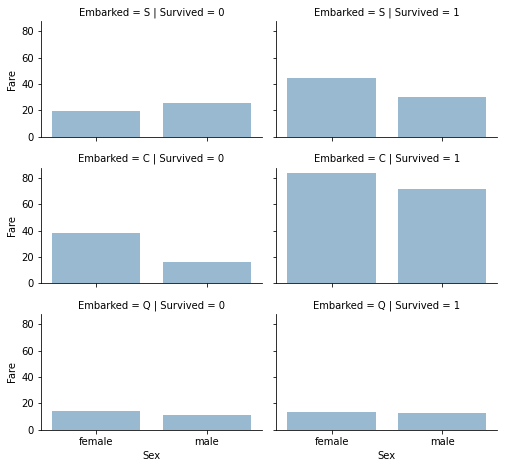

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Datos de disputa

Hemos recopilado varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución. Hasta ahora, no tuvimos que cambiar una sola característica o valor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar metas.

### Corrección eliminando características

Este es un buen objetivo inicial para ejecutar. Al eliminar características, estamos tratando con menos puntos de datos. Acelera nuestro notebook y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar las características de Cabin y Ticket.

Tenga en cuenta que, cuando corresponda, realizamos operaciones en conjuntos de datos de prueba y entrenamiento juntos para mantener la coherencia.

In [17]:
if 'Ticket' and 'Cabin' in train_df.columns:
    print("Antes:", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]
    print("Despues:", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
else:
    print(train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Antes: (891, 12) (418, 11) (891, 12) (418, 11)
Despues: (891, 10) (418, 9) (891, 10) (418, 9)


### Creando nueva característica extrayendolas de características existente

Queremos analizar si la función Nombre se puede diseñar para extraer títulos y probar la correlación entre los títulos y la supervivencia, antes de eliminar las funciones Nombre y PassengerId.

En el siguiente código, extraemos la característica de Título usando expresiones regulares. El patrón RegEx `(\w+\.)` Coincide con la primera palabra que termina con un carácter de punto dentro de la función Nombre. El parámetro `expand=False` devuelve un DataFrame.

**Observaciones.**

Cuando generamos gráficos de Title, Age y Survived, vemos las siguiente observaciones:

- La mayoría de los títulos clasifican los grupos de edad con precisión. Por ejemplo: el título de maestro tiene una edad media de 5 años.
- La supervivencia entre las bandas de Título de Edad varía ligeramente.
- Ciertos títulos sobrevivieron en su mayoría (Mme, Lady, Sir) o no (Don, Rev, Jonkheer).

**Decisiones.**

- Decidimos conservar la nueva función de título para el entrenamiento de modelos.

In [58]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<class 'list'>


IndexError: list index out of range

Podemos reemplazar muchos títulos con un nombre más común o clasificarlos como Raros (`Rare`).

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos convertir los títulos categóricos a ordinales.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Ahora podemos eliminar de forma segura la función Name de los conjuntos de datos de entrenamiento y prueba. Tampoco necesitamos la función PassengerId en el conjunto de datos de entrenamiento.

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Conversión de una característica categórica

Ahora podemos convertir características que contienen cadenas en valores numéricos. Esto es requerido por la mayoría de los algoritmos de modelos. Hacerlo también nos ayudará a lograr el objetivo de completar características.

Comencemos por convertir la característica Sex en una nueva función llamada Gender, donde female=1 and male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completar una función continua numérica

Ahora deberíamos comenzar a estimar y completar características con valores faltantes o nulos. Primero haremos esto para la característica Age.

Podemos considerar tres métodos para completar una característica continua numérica.

1. Una forma sencilla es generar números aleatorios entre la media y la desviación estándar (https://en.wikipedia.org/wiki/Standard_deviation).

2. Una forma más precisa de adivinar los valores perdidos es utilizar otras características correlacionadas. En nuestro caso notamos correlación entre Age, Gender y PClass. Adivine los valores de Age utilizando valores de mediana para Age en conjuntos de combinaciones de características Pclass y Sex. Entonces, la mediana de Age para Pclass=1 y Gender=0, Pclass=1 y Gender=1, y así sucesivamente...

3. Combine los métodos 1 y 2. Entonces, en lugar de adivinar valores de edad basados en la mediana, use números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Gender.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. Preferiremos el método 2.

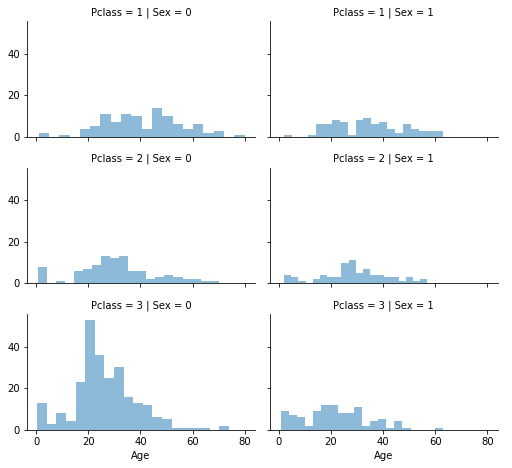

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Comencemos por preparar una matriz vacía para contener valores de Age adivinados basados en combinaciones de Pclass x Gender.

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sex (0 o 1) y Pclass (1, 2, 3) para calcular los valores adivinados de Age para las seis combinaciones.

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Creamos bandas de edad y determinemos las correlaciones con Survived.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Reemplacemos Age con ordinales basados en estas bandas.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Eliminamos la caracteristica AgeBand.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Crear nueva característica combinando características existentes

Podemos crear una nueva función para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Podemos crear otra característica llamada IsAlone.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Dejemos de lado las características Parch, SibSp y FamilySize en favor de IsAlone.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


También podemos crear una función artificial combinando Pclass y Age.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completando una característica categórica

La característica Embarked toma valores S, Q, C según el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores perdidos. Simplemente los llenamos con la ocurrencia más común.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conversión de características categóricas en numéricas

Ahora podemos convertir la característica Embarked creando una nueva característica con un valor numérico.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Completar y convertir rápidamente una característica numérica

Ahora podemos completar la característica Fare para el único valor faltante en el conjunto de datos de prueba usando el modo para obtener el valor que ocurre con más frecuencia para esta función. Hacemos esto en una sola línea de código.

Tenga en cuenta que no estamos creando una nueva característica intermedia ni realizando ningún análisis adicional de correlación para adivinar la característica faltante, ya que solo reemplazamos un valor. El objetivo de finalización logra el requisito deseado para que el algoritmo del modelo opere en valores no nulos.

También es posible que deseemos redondear la tarifa a dos decimales, ya que representa la moneda.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Creamos FareBand.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convertimos la característica de Fare a valores ordinales basados en FareBand.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Y mostramos el dataset de prueba

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modelar, predecir y resolver

Ahora estamos listos para entrenar un modelo y predecir la solución requerida. Hay más de 60 algoritmos de modelado predictivo para elegir. Debemos comprender el tipo de problema y el requisito de solución para limitarnos a unos pocos modelos seleccionados que podamos evaluar. Nuestro problema es un problema de clasificación y regresión. Queremos identificar la relación entre la salida (sobrevivido o no) con otras variables o características (género, edad, puerto ...). También estamos realizando una categoría de aprendizaje automático que se llama aprendizaje supervisado, ya que entrenamos nuestro modelo con un conjunto de datos determinado. Con estos dos criterios: aprendizaje supervisado más clasificación y regresión, podemos reducir nuestra elección de modelos a unos pocos. Éstos incluyen:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

La regresión logística es un modelo útil para ejecutar al principio del flujo de trabajo. La regresión logística mide la relación entre la variable dependiente categórica (característica) y una o más variables independientes (características) mediante la estimación de probabilidades utilizando una función logística, que es la distribución logística acumulativa. 

Tenga en cuenta la puntuación de confianza generada por el modelo en función de nuestro conjunto de datos de entrenamiento.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

Podemos utilizar la regresión logística para validar nuestras suposiciones y decisiones para crear funciones y completar objetivos. Esto se puede hacer calculando el coeficiente de las características en la función de decisión.

Los coeficientes positivos aumentan las probabilidades logarítmicas de la respuesta (y por lo tanto aumentan la probabilidad) y los coeficientes negativos disminuyen las probabilidades logarítmicas de la respuesta (y por lo tanto disminuyen la probabilidad).

- El sexo es el coeficiente positivo más alto, lo que implica que a medida que aumenta el valor de Sexo (hombre: 0 a mujer: 1), la probabilidad de Sobrevivir = 1 aumenta más.
- A la inversa, a medida que aumenta Pclass, la probabilidad de Sobrevivir = 1 es la que más disminuye.
- De esta manera, Edad * Clase es una buena característica artificial para modelar, ya que tiene la segunda correlación negativa más alta con Sobrevivido.
- También lo es el título como la segunda correlación positiva más alta.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


A continuación, modelamos utilizando Support Vector Machines, que son modelos de aprendizaje supervisado con algoritmos de aprendizaje asociados que analizan los datos utilizados para el análisis de clasificación y regresión. Dado un conjunto de muestras de entrenamiento, cada una marcada como perteneciente a una u otra de dos categorías, un algoritmo de entrenamiento de SVM construye un modelo que asigna nuevas muestras de prueba a una categoría u otra, convirtiéndolo en un clasificador lineal binario no probabilístico. 

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

En el reconocimiento de patrones, el algoritmo k-Vecinos más cercanos (o k-NN para abreviar) es un método no paramétrico utilizado para clasificación y regresión. Una muestra se clasifica por mayoría de votos de sus vecinos, y la muestra se asigna a la clase más común entre sus k vecinos más cercanos (k es un número entero positivo, típicamente pequeño). Si k = 1, entonces el objeto simplemente se asigna a la clase de ese único vecino más cercano.

In [44]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

En el aprendizaje automático, los clasificadores de Bayes ingenuos son una familia de clasificadores probabilísticos simples basados en la aplicación del teorema de Bayes con suposiciones de independencia sólidas (ingenuas) entre las características. Los clasificadores Naive Bayes son altamente escalables y requieren un número de parámetros lineales en el número de variables (características) en un problema de aprendizaje.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

El perceptrón es un algoritmo para el aprendizaje supervisado de clasificadores binarios (funciones que pueden decidir si una entrada, representada por un vector de números, pertenece a alguna clase específica o no). Es un tipo de clasificador lineal, es decir, un algoritmo de clasificación que hace sus predicciones basándose en una función de predicción lineal que combina un conjunto de pesos con el vector de características. El algoritmo permite el aprendizaje en línea, ya que procesa los elementos del conjunto de entrenamiento de uno en uno. 

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.01

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

66.22

Este modelo utiliza un árbol de decisiones como modelo predictivo que mapea características (ramas de árboles) a conclusiones sobre el valor objetivo (hojas de árboles). Los modelos de árbol en los que la variable de destino puede tomar un conjunto finito de valores se denominan árboles de clasificación; en estas estructuras de árbol, las hojas representan etiquetas de clase y las ramas representan conjunciones de características que conducen a esas etiquetas de clase. Los árboles de decisión en los que la variable de destino puede tomar valores continuos (normalmente números reales) se denominan árboles de regresión.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

El siguiente modelo de bosques aleatorios es uno de los más populares. Los bosques aleatorios o los bosques de decisiones aleatorias son un método de aprendizaje por conjuntos para la clasificación, regresión y otras tareas, que operan mediante la construcción de una multitud de árboles de decisión (n_estimators = 100) en el momento del entrenamiento y generando la clase que es el modo de las clases (clasificación) o predicción media (regresión) de los árboles individuales. 

El puntaje de confianza del modelo es el más alto entre los modelos evaluados hasta ahora. Decidimos utilizar la salida de este modelo (Y_pred) para crear la presentación de resultados de nuestra competencia.

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Evaluación del modelo

Ahora podemos clasificar nuestra evaluación de todos los modelos para elegir el mejor para nuestro problema. Si bien tanto el árbol de decisiones como el bosque aleatorio obtienen la misma puntuación, elegimos usar el bosque aleatorio, ya que corrigen el hábito de los árboles de decisión de adaptarse en exceso a su conjunto de entrenamiento.

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,66.22


Generemos un gráfico con estos resultados:

In [52]:
listaNombresModelos = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 
              'Linear SVC', 'Perceptron', 'Support Vector Machines', 'Stochastic Gradient Decent', 
              'Naive Bayes']
listaPrecisionModelos = [acc_random_forest, acc_decision_tree, acc_knn, acc_log, 
                         acc_linear_svc, acc_perceptron, acc_svc, acc_sgd, acc_gaussian]

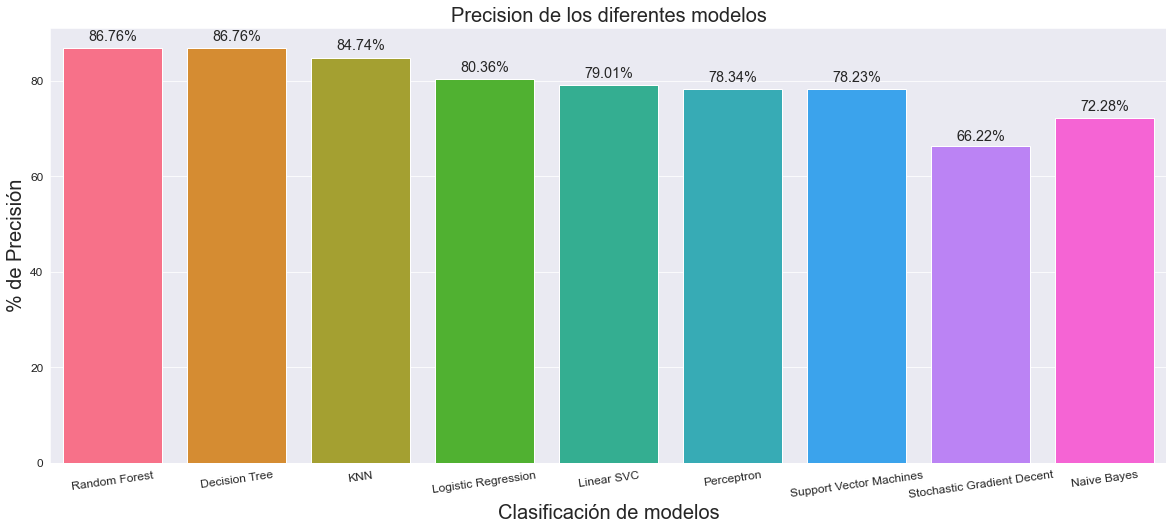

In [53]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=listaNombresModelos, y=listaPrecisionModelos, palette = "husl", saturation =2.0)
plt.xlabel('Clasificación de modelos', fontsize = 20 )
plt.ylabel('% de Precisión', fontsize = 20)
plt.title('Precision de los diferentes modelos', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Exportemos los resultados:

In [54]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', sep=';', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
